

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

/home/yannis/anaconda3/envs/working/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1156499681797001009
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1412169728
locality {
  bus_id: 1
}
incarnation: 5721300576834461865
physical_device_desc: "device: 0, name: GeForce GTX 960M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [2]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### 2. Visualize the First 24 Training Images

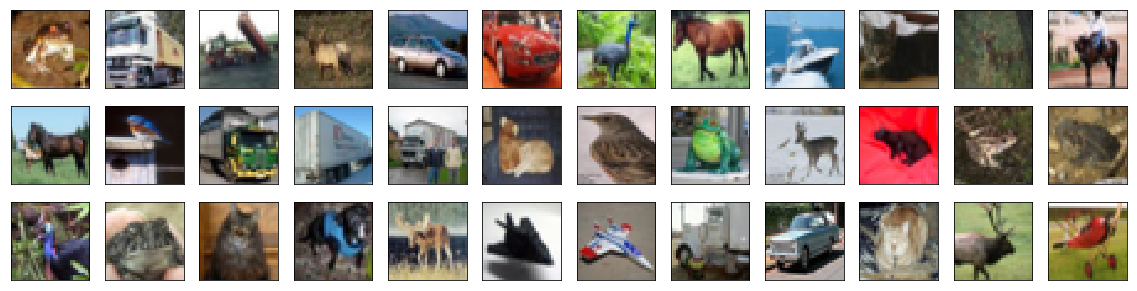

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [4]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [5]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=4, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
#model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 4)         52        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               512500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total params: 517,562
Trainable params: 517,562
Non-trainable params: 0
_________________________________________________________________


### 6. Compile the Model 

In [7]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [8]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 9s - loss: 1.6523 - acc: 0.4087 - val_loss: 1.4646 - val_acc: 0.4854

Epoch 00001: val_loss improved from inf to 1.46461, saving model to model.weights.best.hdf5
Epoch 2/20
 - 7s - loss: 1.3859 - acc: 0.5088 - val_loss: 1.3680 - val_acc: 0.5188

Epoch 00002: val_loss improved from 1.46461 to 1.36798, saving model to model.weights.best.hdf5
Epoch 3/20
 - 7s - loss: 1.2860 - acc: 0.5489 - val_loss: 1.4190 - val_acc: 0.5014

Epoch 00003: val_loss did not improve
Epoch 4/20
 - 7s - loss: 1.2173 - acc: 0.5753 - val_loss: 1.2586 - val_acc: 0.5704

Epoch 00004: val_loss improved from 1.36798 to 1.25858, saving model to model.weights.best.hdf5
Epoch 5/20
 - 7s - loss: 1.1566 - acc: 0.5978 - val_loss: 1.3162 - val_acc: 0.5466

Epoch 00005: val_loss did not improve
Epoch 6/20
 - 8s - loss: 1.1090 - acc: 0.6153 - val_loss: 1.2317 - val_acc: 0.5760

Epoch 00006: val_loss improved from 1.25858 to 1.23167, saving model to model.weights.b

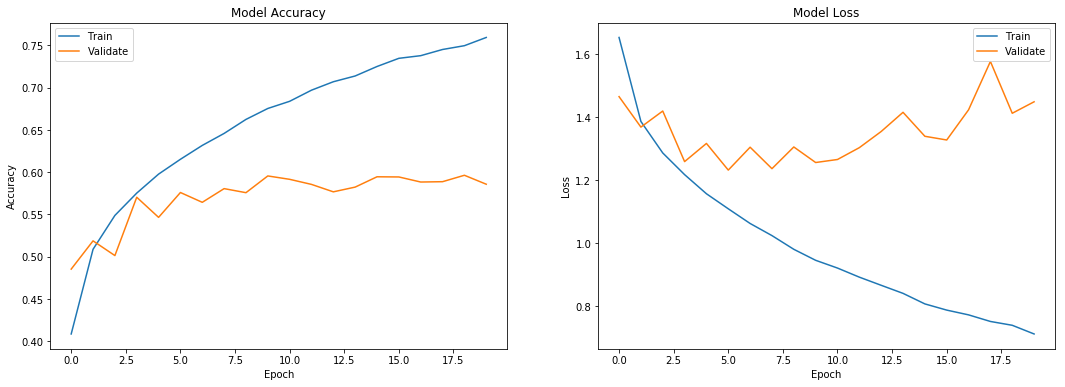

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=False)

ax1.plot(hist.model.model.history.history['acc'])
ax1.plot(hist.model.model.history.history['val_acc'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validate'], loc='upper left')

ax2.plot(hist.model.model.history.history['loss'])
ax2.plot(hist.model.model.history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validate'], loc='upper right')

plt.show()

In [11]:
model.save('simplest.h5')

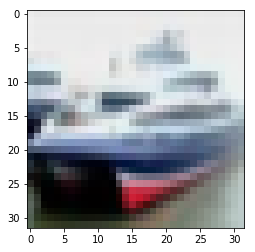

In [43]:
plt.imshow(x_test[1])

In [46]:
from keras import backend as K

layer_dict = dict([(layer.name, layer) for layer in model.layers])

layer_name = 'conv2d_1'
filter_index = 0  # can be any integer from 0 to 511, as there are 512 filters in that layer

# build a loss function that maximizes the activation
# of the nth filter of the layer considered
layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, :, :, filter_index])

# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])

TypeError: gradients() missing 1 required positional argument: 'variables'

In [21]:
input_img_data

array([[[[139.27025272, 132.60457033, 134.28456844, ..., 130.88514445,
          140.59517867, 140.58200474],
         [137.14411386, 147.77519185, 143.27963093, ..., 134.41375251,
          141.00614099, 144.40640028],
         [128.15952095, 145.85943346, 130.23882873, ..., 138.59995816,
          144.30446473, 142.09000454],
         ...,
         [136.45102362, 141.09962432, 145.20954482, ..., 145.4513194 ,
          141.10438   , 136.70350529],
         [145.44991473, 141.69451665, 135.00332505, ..., 143.52047395,
          130.4915453 , 128.96789179],
         [131.93288452, 144.42275694, 138.76643966, ..., 147.41061005,
          133.95266849, 133.32709897]],

        [[133.74104298, 146.9572115 , 141.08409565, ..., 128.12261145,
          144.54097884, 145.08530535],
         [140.77617643, 128.10207133, 141.10670041, ..., 133.62899352,
          142.4255963 , 130.00089206],
         [141.06492962, 138.11387512, 142.48545435, ..., 134.80411674,
          142.90133633, 130.58280

In [16]:
from vis.optimizer import Optimizer

optimizer = Optimizer(model.input, losses)
opt_img, grads, _ = optimizer.minimize()

Iteration: 1, named_losses: <zip object at 0x7f7e4ba82cc8>, overall loss: 6050.05908203125
Iteration: 2, named_losses: <zip object at 0x7f7e4ba82e08>, overall loss: 2965.830810546875
Iteration: 3, named_losses: <zip object at 0x7f7e4ba82e48>, overall loss: 1538.3502197265625
Iteration: 4, named_losses: <zip object at 0x7f7e4ba82ec8>, overall loss: 780.370849609375
Iteration: 5, named_losses: <zip object at 0x7f7e4ba82f08>, overall loss: 373.9424743652344
Iteration: 6, named_losses: <zip object at 0x7f7e4ba82e88>, overall loss: 187.3671875
Iteration: 7, named_losses: <zip object at 0x7f7e4ba82f48>, overall loss: 131.1233673095703
Iteration: 8, named_losses: <zip object at 0x7f7e4ba82f88>, overall loss: 90.84126281738281
Iteration: 9, named_losses: <zip object at 0x7f7e4ba82fc8>, overall loss: 64.02272033691406
Iteration: 10, named_losses: <zip object at 0x7f7e4ba82b88>, overall loss: 48.40009689331055
Iteration: 11, named_losses: <zip object at 0x7f7e4ba82d08>, overall loss: 39.28327941

Iteration: 129, named_losses: <zip object at 0x7f7e4ba1a648>, overall loss: 2.506929397583008
Iteration: 130, named_losses: <zip object at 0x7f7e4ba1a1c8>, overall loss: 1.583364486694336
Iteration: 131, named_losses: <zip object at 0x7f7e4ba1a108>, overall loss: 2.4722671508789062
Iteration: 132, named_losses: <zip object at 0x7f7e4ba1a208>, overall loss: 1.5493850708007812
Iteration: 133, named_losses: <zip object at 0x7f7e4ba1a188>, overall loss: 2.4439010620117188
Iteration: 134, named_losses: <zip object at 0x7f7e4ba1a708>, overall loss: 1.5278797149658203
Iteration: 135, named_losses: <zip object at 0x7f7e4ba1a648>, overall loss: 2.4313602447509766
Iteration: 136, named_losses: <zip object at 0x7f7e4ba1a1c8>, overall loss: 1.5242481231689453
Iteration: 137, named_losses: <zip object at 0x7f7e4ba1a188>, overall loss: 2.4362545013427734
Iteration: 138, named_losses: <zip object at 0x7f7e4ba1a708>, overall loss: 1.5203227996826172
Iteration: 139, named_losses: <zip object at 0x7f7e4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


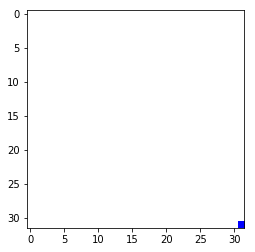

In [18]:
plt.imshow(opt_img)

### 8. Load the Model with the Best Validation Accuracy

In [10]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [11]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.5699


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [10]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

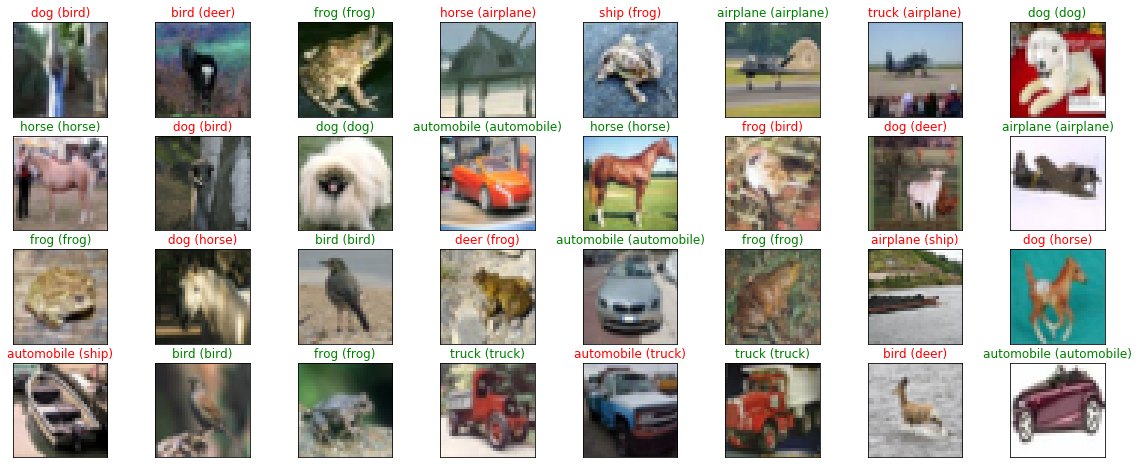

In [11]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))